In [1]:
import pandas as pd

data = pd.read_csv('chatbot_data_1.csv')

In [2]:
data

,Question,Answer,Intent,tag
0,Hi,Hey :-),greeting,Welcome
1,Hey,"Hello, thanks for visiting",greeting,Welcome
2,How are you,"Hi there, what can I do for you?",greeting,Welcome
3,Is anyone there?,"Hi there, how can I help?",greeting,Welcome
4,Hello,Is there anything I can help you.,greeting,Welcome
...,...,...,...,...
70,A small chicken pizza and a Pepsi plz.,"Sure, one small chicken pizza and one Pepsi ar...",order - pizza,Order
71,I wanna order a large chicken pizza and a Coca.,"Sure, one large chicken pizza and one Coca are...",order - pizza,Order
72,"Two large veg pizzas, please.","Sure, one large veg pizza is in your order. Wh...",order - pizza,Order
73,"One chicken pizza, please.","Sure, one chicken pizza is in your order. Wher...",order - pizza,Order


In [3]:
temp = pd.DataFrame()
temp['Question'] = data['Answer']
temp['tag'] = data['tag']

In [4]:
data = data.drop(["Answer"],axis = 1)
data = data.append(temp,ignore_index=True)

C:\Users\Wu\AppData\Local\Temp/ipykernel_11944/2506823793.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temp,ignore_index=True)


In [5]:
data = data.rename(columns={'Question':'text'})

In [6]:
import re
import nltk
def utils_preprocess_text(text, flg_lemm=True,lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [7]:
lst_stopwords = nltk.corpus.stopwords.words("english")

data["text_clean"] = data["text"].apply(lambda x: utils_preprocess_text(x, flg_lemm=True,lst_stopwords = lst_stopwords))
data

,text,Intent,tag,text_clean
0,Hi,greeting,Welcome,hi
1,Hey,greeting,Welcome,hey
2,How are you,greeting,Welcome,
3,Is anyone there?,greeting,Welcome,anyone
4,Hello,greeting,Welcome,hello
...,...,...,...,...
145,"Sure, one small chicken pizza and one Pepsi ar...",NaN,Order,sure one small chicken pizza one pepsi order d...
146,"Sure, one large chicken pizza and one Coca are...",NaN,Order,sure one large chicken pizza one coca order de...
147,"Sure, one large veg pizza is in your order. Wh...",NaN,Order,sure one large veg pizza order deliver
148,"Sure, one chicken pizza is in your order. Wher...",NaN,Order,sure one chicken pizza order deliver


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer()

#text_vect = count_vect.fit_transform(data["text_clean"])
text_vect = tfidf_vect.fit_transform(data["text_clean"])

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_vect, data["tag"], test_size = 0.3, random_state = 0)

In [10]:
# Apply linear SVM model
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1.5, penalty='l2').fit(x_train, y_train)
print('Training accuracy is %.2f and test accuracy is %.2f' %(svc.score(x_train,y_train),svc.score(x_test,y_test)))

Training accuracy is 1.00 and test accuracy is 0.98


In [11]:
from sklearn.metrics import confusion_matrix 
import numpy as np

cm_svc = confusion_matrix(y_test, svc.predict(x_test))
print(cm_svc)

[[ 6  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  1  0  0  3  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  9]]


<AxesSubplot:>

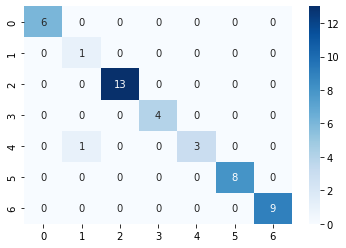

In [12]:
import numpy as np
import seaborn as sns
sns.heatmap(cm_svc, annot=True, 
             cmap='Blues')

In [13]:
from sklearn import metrics
print(metrics.classification_report(y_test, svc.predict(x_test)))

                precision    recall  f1-score   support

       Booking       1.00      1.00      1.00         6
      Delivery       0.50      1.00      0.67         1
          Food       1.00      1.00      1.00        13
         Order       1.00      1.00      1.00         4
       Payment       1.00      0.75      0.86         4
Price and Size       1.00      1.00      1.00         8
       Welcome       1.00      1.00      1.00         9

      accuracy                           0.98        45
     macro avg       0.93      0.96      0.93        45
  weighted avg       0.99      0.98      0.98        45



In [14]:
# Apply decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)  # build the model
dt.fit(x_train, y_train)
print('Training accuracy is %.2f and test accuracy is %.2f' %(dt.score(x_train, y_train),dt.score(x_test, y_test)))

Training accuracy is 0.69 and test accuracy is 0.69


In [15]:
from sklearn.metrics import confusion_matrix 
import numpy as np

cm_dt = confusion_matrix(y_test, dt.predict(x_test))
print(cm_dt)

[[ 5  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1]
 [ 0  0 10  0  0  0  3]
 [ 0  0  1  2  0  0  1]
 [ 0  0  0  1  2  0  1]
 [ 0  0  5  0  0  3  0]
 [ 0  0  0  0  0  0  9]]


<AxesSubplot:>

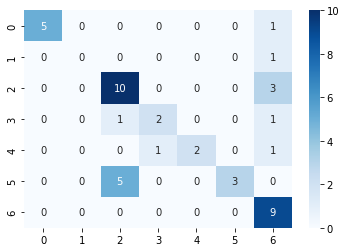

In [16]:
import numpy as np
import seaborn as sns
sns.heatmap(cm_dt, annot=True, 
             cmap='Blues')

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test, dt.predict(x_test)))

                precision    recall  f1-score   support

       Booking       1.00      0.83      0.91         6
      Delivery       0.00      0.00      0.00         1
          Food       0.62      0.77      0.69        13
         Order       0.67      0.50      0.57         4
       Payment       1.00      0.50      0.67         4
Price and Size       1.00      0.38      0.55         8
       Welcome       0.56      1.00      0.72         9

      accuracy                           0.69        45
     macro avg       0.69      0.57      0.59        45
  weighted avg       0.75      0.69      0.67        45



C:\Users\Wu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Apply GradientBoosting model
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)
print('Training accuracy is %.2f and test accuracy is %.2f' %(gbrt.score(x_train, y_train),gbrt.score(x_test, y_test)))

Training accuracy is 1.00 and test accuracy is 0.78


In [19]:
cm_gbrt = confusion_matrix(y_test, gbrt.predict(x_test))
print(cm_gbrt)

[[5 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]
 [0 2 9 0 0 0 2]
 [0 0 0 4 0 0 0]
 [0 1 0 0 2 0 1]
 [0 0 3 0 0 5 0]
 [0 0 0 0 0 0 9]]


<AxesSubplot:>

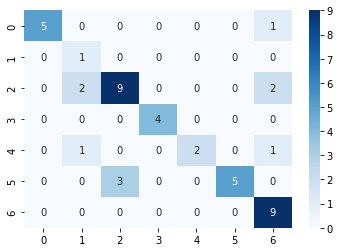

In [20]:
sns.heatmap(cm_gbrt, annot=True, 
             cmap='Blues')

In [21]:
print(metrics.classification_report(y_test, gbrt.predict(x_test)))

                precision    recall  f1-score   support

       Booking       1.00      0.83      0.91         6
      Delivery       0.25      1.00      0.40         1
          Food       0.75      0.69      0.72        13
         Order       1.00      1.00      1.00         4
       Payment       1.00      0.50      0.67         4
Price and Size       1.00      0.62      0.77         8
       Welcome       0.69      1.00      0.82         9

      accuracy                           0.78        45
     macro avg       0.81      0.81      0.75        45
  weighted avg       0.85      0.78      0.79        45



In [22]:
# Apply KNN model
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train, y_train)
print('Training accuracy is %.2f and test accuracy is %.2f' %(KNN.score(x_train, y_train),KNN.score(x_test, y_test)))

Training accuracy is 1.00 and test accuracy is 0.87


In [23]:
cm_KNN = confusion_matrix(y_test, KNN.predict(x_test))
print(cm_KNN)

[[ 5  0  0  1  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  2 11  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  1  0  0  3  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  2  0  0  7]]


<AxesSubplot:>

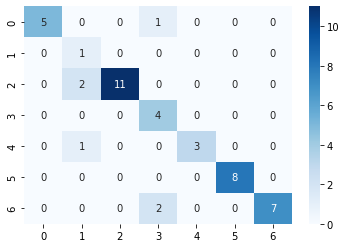

In [24]:
sns.heatmap(cm_KNN, annot=True, 
             cmap='Blues')

In [25]:
print(metrics.classification_report(y_test, KNN.predict(x_test)))

                precision    recall  f1-score   support

       Booking       1.00      0.83      0.91         6
      Delivery       0.25      1.00      0.40         1
          Food       1.00      0.85      0.92        13
         Order       0.57      1.00      0.73         4
       Payment       1.00      0.75      0.86         4
Price and Size       1.00      1.00      1.00         8
       Welcome       1.00      0.78      0.88         9

      accuracy                           0.87        45
     macro avg       0.83      0.89      0.81        45
  weighted avg       0.95      0.87      0.89        45



In [26]:
data

,text,Intent,tag,text_clean
0,Hi,greeting,Welcome,hi
1,Hey,greeting,Welcome,hey
2,How are you,greeting,Welcome,
3,Is anyone there?,greeting,Welcome,anyone
4,Hello,greeting,Welcome,hello
...,...,...,...,...
145,"Sure, one small chicken pizza and one Pepsi ar...",NaN,Order,sure one small chicken pizza one pepsi order d...
146,"Sure, one large chicken pizza and one Coca are...",NaN,Order,sure one large chicken pizza one coca order de...
147,"Sure, one large veg pizza is in your order. Wh...",NaN,Order,sure one large veg pizza order deliver
148,"Sure, one chicken pizza is in your order. Wher...",NaN,Order,sure one chicken pizza order deliver


In [27]:
# Clustering

from sklearn.manifold import TSNE

vect_weight = text_vect.toarray()
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(vect_weight)

In [28]:
decomposition_data 

array([[ -69.52469   ,   -5.552261  ],
       [  90.960915  ,   54.27574   ],
       [ -22.131166  ,  -16.093529  ],
       [ -15.242271  ,  -21.898476  ],
       [ -98.54915   ,  -17.056921  ],
       [ -47.2639    ,   20.984833  ],
       [ -49.87341   ,  -11.496665  ],
       [  34.10171   ,   86.27371   ],
       [ -17.696577  ,  109.1744    ],
       [ -16.2938    ,  114.70915   ],
       [  15.066331  ,   94.62648   ],
       [ -31.619322  ,  -50.17133   ],
       [ -51.06653   ,   68.07895   ],
       [  10.194567  ,   99.31955   ],
       [  54.47947   ,  -49.660725  ],
       [  87.97722   ,  -13.72067   ],
       [   7.898149  ,  -41.10743   ],
       [   2.3571186 ,  -35.495922  ],
       [  56.31489   ,   -3.4291925 ],
       [  85.805954  ,  -20.200504  ],
       [ -33.289448  ,  -34.406067  ],
       [ -19.444357  ,  -63.339626  ],
       [   7.4036827 ,   -1.2792796 ],
       [ -40.025497  ,  -64.16701   ],
       [  79.857216  ,  -14.694362  ],
       [  51.8124    ,   

In [29]:
# Map label into index for Kappa score
Index = {
    "Welcome":0,
    "Food":1,
    "Price and Size":2,
    "Payment":3,
    "Delivery":4,
    'Booking':5,
    'Order':6
    
}
data["index"] = data['tag'].map(Index)
data

,text,Intent,tag,text_clean,index
0,Hi,greeting,Welcome,hi,0
1,Hey,greeting,Welcome,hey,0
2,How are you,greeting,Welcome,,0
3,Is anyone there?,greeting,Welcome,anyone,0
4,Hello,greeting,Welcome,hello,0
...,...,...,...,...,...
145,"Sure, one small chicken pizza and one Pepsi ar...",NaN,Order,sure one small chicken pizza one pepsi order d...,6
146,"Sure, one large chicken pizza and one Coca are...",NaN,Order,sure one large chicken pizza one coca order de...,6
147,"Sure, one large veg pizza is in your order. Wh...",NaN,Order,sure one large veg pizza order deliver,6
148,"Sure, one chicken pizza is in your order. Wher...",NaN,Order,sure one chicken pizza order deliver,6


In [30]:
label = data['index']

C:\Users\Wu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


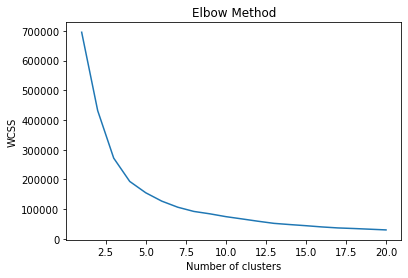

In [31]:
# Kmeans clustering 
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(decomposition_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
km = KMeans(n_clusters = 7, init='k-means++', max_iter=300, n_init=10, random_state=5)
#km.fit(decomposition_data,label)
km.fit(text_vect,label)

KMeans(n_clusters=7, random_state=5)

In [33]:
oc = km.cluster_centers_.argsort()[:,::-1]
u_words = tfidf_vect.get_feature_names()
# top 10 word in 7 clusters
for i in range(0,7):
    top_words = [u_words[x] for x in oc[i,:10]]
    print(top_words)

['hi', 'help', 'special', 'thanks', 'beverage', 'get', 'goodbye', 'hey', 'thank', 'item']
['one', 'order', 'deliver', 'sure', 'address', 'chicken', 'coca', 'pizza', 'large', 'wanna']
['pay', 'google', 'delivery', 'etransfer', 'cash', 'make', 'available', 'much', 'order', 'welcome']
['dollar', '10', 'medium', 'large', 'small', 'price', '12', 'small7', 'dollarsmedium10', 'large12']
['spirit', 'beer', 'pepsi', 'coca', 'like', 'drink', 'soft', 'pizza', 'also', 'chicken']
['table', 'book', 'sure', 'want', 'people', 'december', '4pm', 'tomorrow', 'yes', 'set']
['pizza', 'chicken', 'veg', 'cost', 'price', 'size', 'offer', 'new', 'york', 'small']


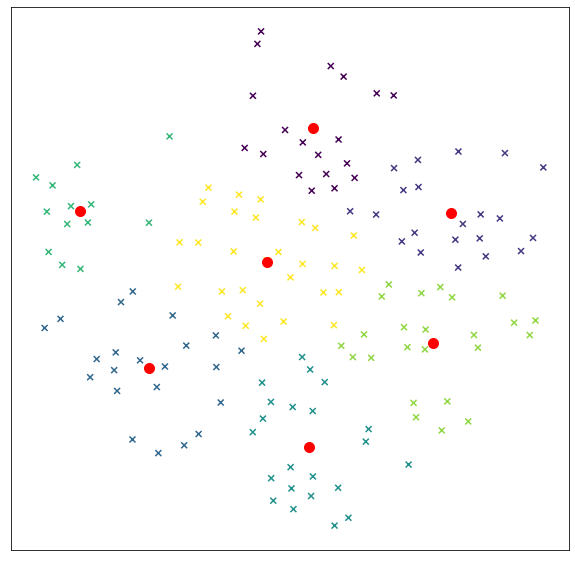

In [34]:
km.fit(decomposition_data,label)
x = []
y = []

for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, c=km.labels_, marker="x")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='red')
plt.xticks(())
plt.yticks(())
plt.show()

In [35]:
# Calculate Kappa score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(km.labels_, label)

0.016137428422696498

In [36]:
# Calculate Silhouette score
X = decomposition_data

from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_, metric = "euclidean")

0.37088078

In [37]:
# Hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

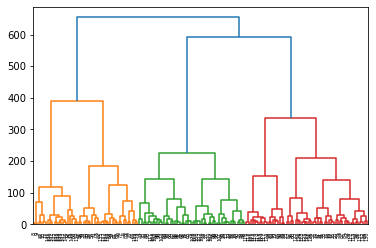

In [38]:
# create dendrogram text_vect.toarray()
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [39]:
# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X,label)

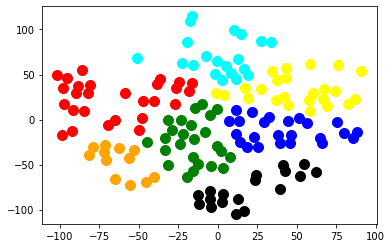

In [40]:
plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=100, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=100, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=100, c='blue')
plt.scatter(X[y_hc ==3,0], X[y_hc == 3,1], s=100, c='cyan')
plt.scatter(X[y_hc ==4,0], X[y_hc == 4,1], s=100, c='green')
plt.scatter(X[y_hc ==5,0], X[y_hc == 5,1], s=100, c='yellow')
plt.scatter(X[y_hc ==6,0], X[y_hc == 6,1], s=100, c='orange')

In [41]:
# Calculate Kappa score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_hc, label)

-0.02941176470588247

In [42]:
# Calculate Kappa score
from sklearn.metrics import silhouette_score
silhouette_score(X,y_hc, metric = "euclidean")

0.31455776

In [43]:
# EM Gaussian Mixture
from sklearn.mixture import GaussianMixture
import numpy as np

C:\Users\Wu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'n_components')

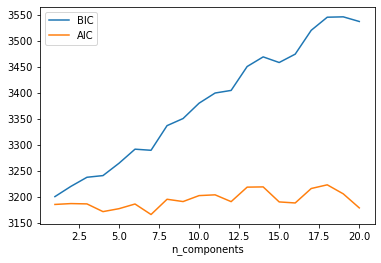

In [44]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [45]:
gmm = GaussianMixture(n_components=7)
gmm.fit(X,label)

GaussianMixture(n_components=7)

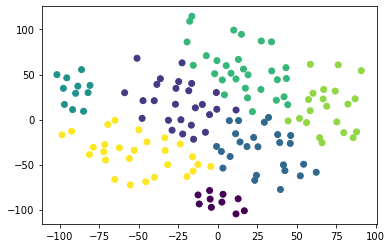

In [46]:
pred_label = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred_label, cmap='viridis')

In [47]:
# Calculate Kappa score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(pred_label, label)

-0.13483262514250183

In [48]:
# Calculate Kappa score

from sklearn.metrics import silhouette_score
silhouette_score(X,pred_label, metric = "euclidean")

0.32717103

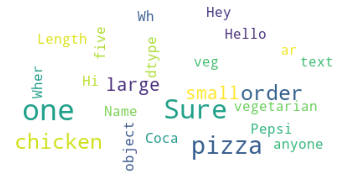

In [49]:
import wordcloud
wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                         max_font_size=35)
wc = wc.generate(str(data['text']))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()